Video Game Analysis


Data Prepocessing

In [37]:
import numpy as np
import pandas as pd

videogame_sales_2024_df = pd.read_csv("vgchartz-2024.csv", sep=',', decimal='.')
videogame_sales_2024_df_cleaned = videogame_sales_2024_df.drop_duplicates()
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned.dropna(subset=['release_date', 'genre', 'jp_sales', 'pal_sales'])
videogame_sales_2024_df_cleaned["release_date"] = pd.to_datetime(videogame_sales_2024_df_cleaned["release_date"])
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[["title" ,"console", "genre", "total_sales", "na_sales", "jp_sales", "pal_sales", "release_date"]]
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[videogame_sales_2024_df_cleaned["release_date"] >= pd.to_datetime('2000-01-01')]

In [38]:
import numpy as np
import pandas as pd

video_games_sales_df = pd.read_csv("video_games_sales.csv", sep=',', decimal='.')
video_games_sales_df_cleaned = video_games_sales_df.drop_duplicates()
video_games_sales_df_cleaned = video_games_sales_df_cleaned.dropna(subset=['year', 'genre', 'jp_sales', 'eu_sales'])
video_games_sales_df_cleaned = video_games_sales_df_cleaned[["name" ,"platform", "genre", "na_sales", "jp_sales", "eu_sales", "year"]]
video_games_sales_df_cleaned = video_games_sales_df_cleaned[video_games_sales_df_cleaned["year"] > 2010]

In [39]:
import numpy as np
import pandas as pd

def mean(val):
    numbers = val.split('-')                
    return (float(numbers[0].strip()) + float(numbers[1].strip())) / 2       

steam_games_beforemarch2025 = pd.read_csv("games_march2025_full.csv", sep=',', decimal='.')
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025.drop_duplicates()
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned.dropna(subset=['user_score', 'genres', 'estimated_owners'])
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned[['user_score', 'genres', 'estimated_owners']]
steam_games_beforemarch2025_cleaned["estimated_owners"] = steam_games_beforemarch2025_cleaned["estimated_owners"].apply(mean)
print(steam_games_beforemarch2025_cleaned.head())

   user_score                                             genres  \
0           0                         ['Action', 'Free To Play']   
1           0  ['Action', 'Adventure', 'Massively Multiplayer...   
2           0             ['Action', 'Strategy', 'Free To Play']   
3           0                            ['Action', 'Adventure']   
4           0                                         ['Action']   

   estimated_owners  
0       150000000.0  
1        75000000.0  
2       350000000.0  
3        75000000.0  
4           10000.0  


Graphs

Text(0.5, 1.0, 'Video Games Sales per genre released in 2025')

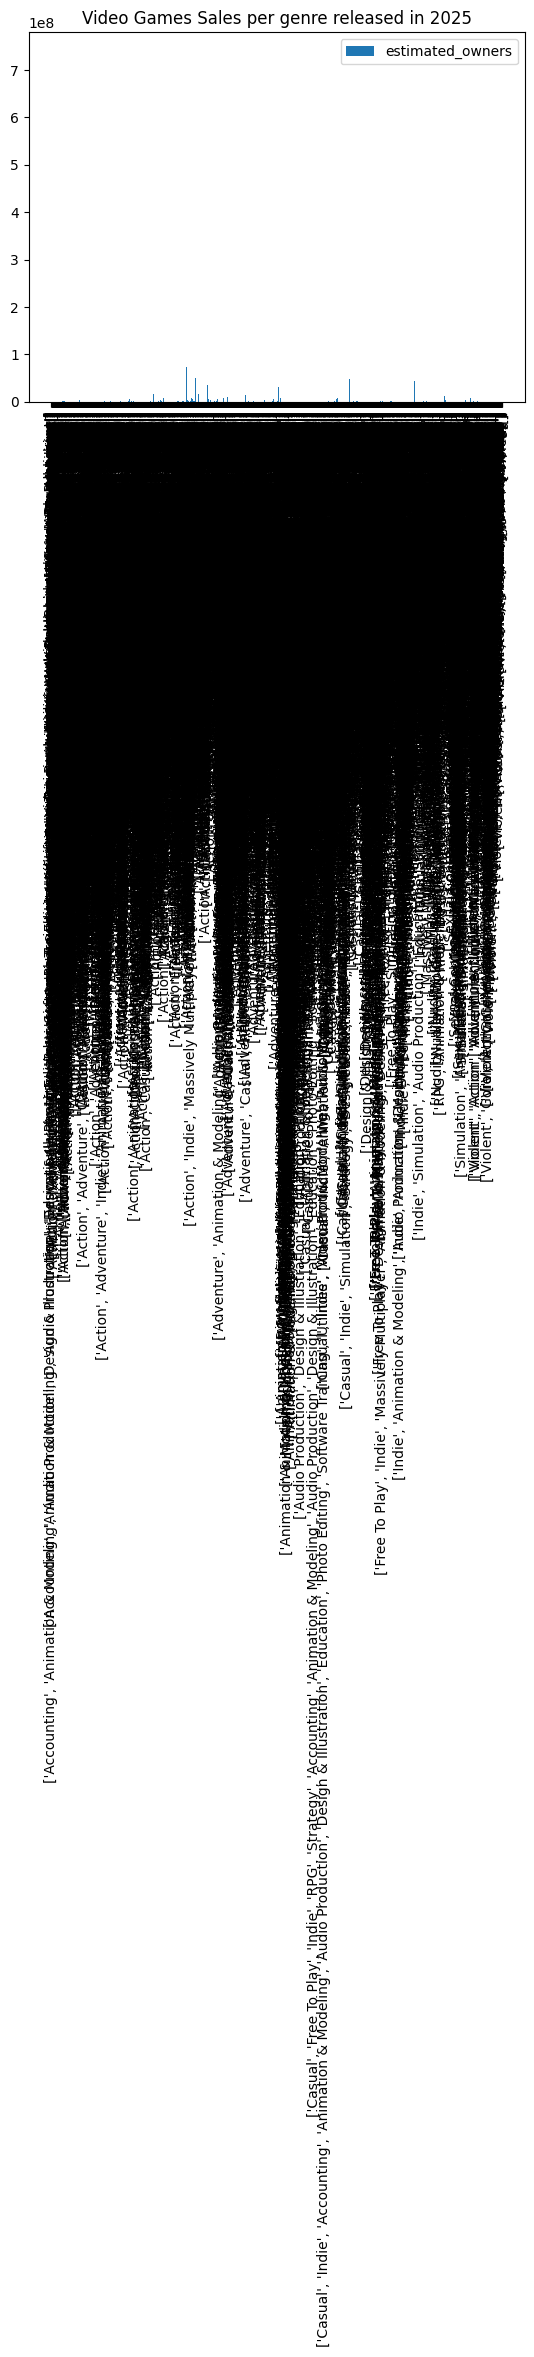

In [40]:
import matplotlib.pyplot as plt

salesPerGenre = steam_games_beforemarch2025_cleaned.groupby(["genres"]).sum().reset_index()
plt.bar(salesPerGenre["genres"], salesPerGenre["estimated_owners"], label="estimated_owners")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.title("Video Games Sales per genre released in 2025")
#plt.show()

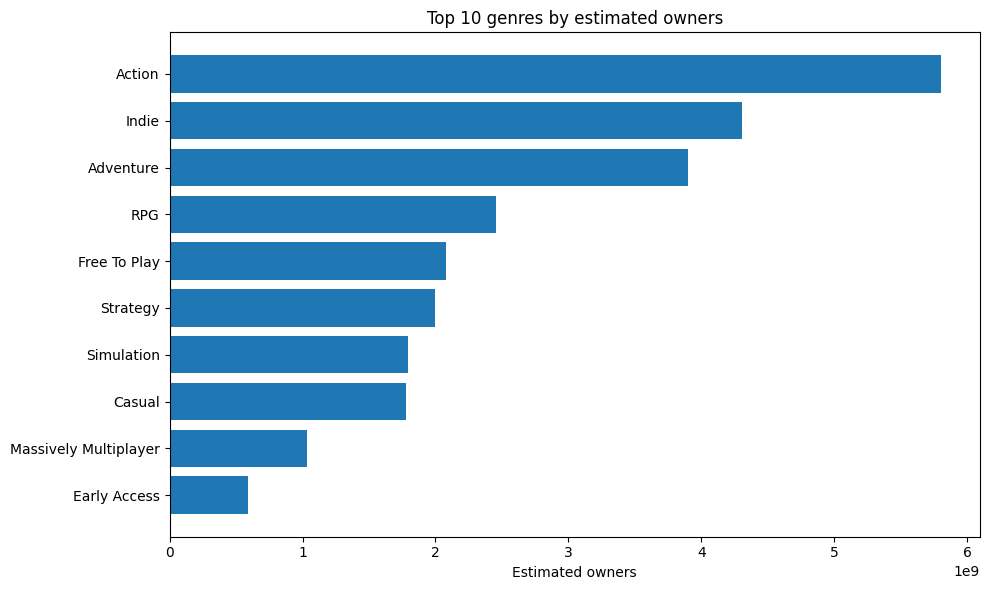

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   

steam_games_beforemarch2025 = pd.read_csv("games_march2025_full.csv", sep=',', decimal='.')
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025.drop_duplicates()
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned.dropna(subset=['user_score', 'genres', 'estimated_owners'])
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned[['user_score', 'genres', 'estimated_owners']]
steam_games_beforemarch2025_cleaned["estimated_owners"] = steam_games_beforemarch2025_cleaned["estimated_owners"].apply(mean)

# nettoyage simple de la colonne genres
steam_games_beforemarch2025_cleaned["genres"] = steam_games_beforemarch2025_cleaned["genres"].astype(str).str.strip("[]").str.replace("'", "", regex=False).str.replace('"', "", regex=False)

# split en listes et explode
steam_games_beforemarch2025_cleaned["genres"] = steam_games_beforemarch2025_cleaned["genres"].str.split(",")
steam_games_beforemarch2025_exploded = steam_games_beforemarch2025_cleaned.explode("genres")
steam_games_beforemarch2025_exploded["genres"] = steam_games_beforemarch2025_exploded["genres"].str.strip()

# groupby et tri
salesPerGenre = steam_games_beforemarch2025_exploded.groupby("genres")["estimated_owners"].sum().sort_values(ascending=False).head(10)

# plot
plt.figure(figsize=(10,6))
plt.barh(salesPerGenre.index[::-1], salesPerGenre.values[::-1])
plt.xlabel("Estimated owners")
plt.title("Top 10 genres by estimated owners")
plt.tight_layout()
plt.show()